In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Synthetic dataset
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [4]:
X, y

(array([[-1.36120101,  1.85561579],
        [ 0.46682131,  0.86870835],
        [-0.16190699,  1.62674345],
        ...,
        [-1.58094163,  1.34209268],
        [ 0.76235255,  1.29720731],
        [ 1.30085245,  1.17819979]], shape=(1000, 2)),
 array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0

In [5]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

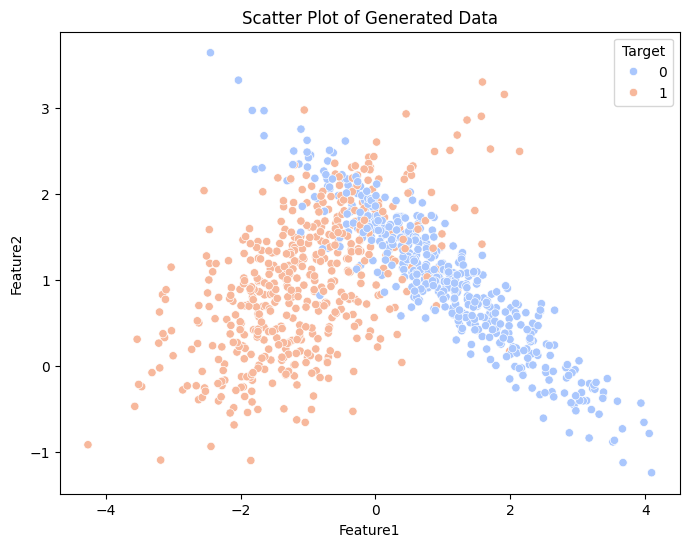

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df, palette='coolwarm')
plt.title("Scatter Plot of Generated Data")
plt.show()

In [7]:
X = df[['Feature1', 'Feature2']]
y = df['Target']

In [8]:
from sklearn.svm import SVC

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
svc = SVC(kernel= 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
y_pred = svc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       100
           1       0.93      0.84      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [14]:
print(confusion_matrix(y_test, y_pred))

[[94  6]
 [16 84]]


In [15]:
rbf = SVC(kernel='rbf')

In [16]:
rbf.fit(X_train, y_train)

SVC()

In [17]:
y_pred = rbf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       100
           1       0.95      0.83      0.89       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



In [19]:
confusion_matrix(y_test, y_pred)

array([[96,  4],
       [17, 83]])

In [20]:
polynomial = SVC(kernel= 'poly')
polynomial.fit(X_train, y_train)
y_pred = polynomial.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       100
           1       0.93      0.69      0.79       100

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200



array([[95,  5],
       [31, 69]])

In [21]:
polynomial = SVC(kernel= 'sigmoid')
polynomial.fit(X_train, y_train)
y_pred = polynomial.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.83      0.78      0.80       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



array([[84, 16],
       [22, 78]])

Hence, Linear Kernel works the best.

Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid= param_grid, refit= True, cv= 5, verbose= 3)

In [30]:
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END C=0.01, gamma=0.001, kernel=linear;, score=0.844 total time=   0.0s
[CV 2/5] END C=0.01, gamma=0.001, kernel=linear;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.01, gamma=0.001, kernel=linear;, score=0.825 total time=   0.0s
[CV 4/5] END C=0.01, gamma=0.001, kernel=linear;, score=0.906 total time=   0.0s
[CV 5/5] END C=0.01, gamma=0.001, kernel=linear;, score=0.869 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.856 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.787 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.831 total time=   0.0s
[CV 1/5] END C=0.01, gamma=0.001, kernel=sigmoid;, score=0.856 total time=   0.0s
[CV 2/5] END C=0.01, gamma=0.001, kernel=sigm

In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       100
           1       0.91      0.83      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200

[[92  8]
 [17 83]]


In [32]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}